`wu_data_gen_perfect.ipynb`

> Generating noise-free wrapped angle data for TensorFlow training

In [49]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

> All the data will have the same phase $\phi = 0$, and the same set of frequencies $\nu$. 
> $\tau$ will vary from -100 ns to 100 ns, with 10000 values.

In [2]:
# frequencies
# from 0.100 GHZ to 0.200 GHz, 1024 channels, 
# (9.77517107e-05 GHz per channel)
freqs = np.linspace(0.1, 0.2, 1024)

In [42]:
# delay time tau 
# from -100 ns to 100 ns
# (in steps of 1 ns)
abs_max_tau = 100 
num_taus = 10000
taus = np.linspace(-abs_max_tau, abs_max_tau, num_taus)

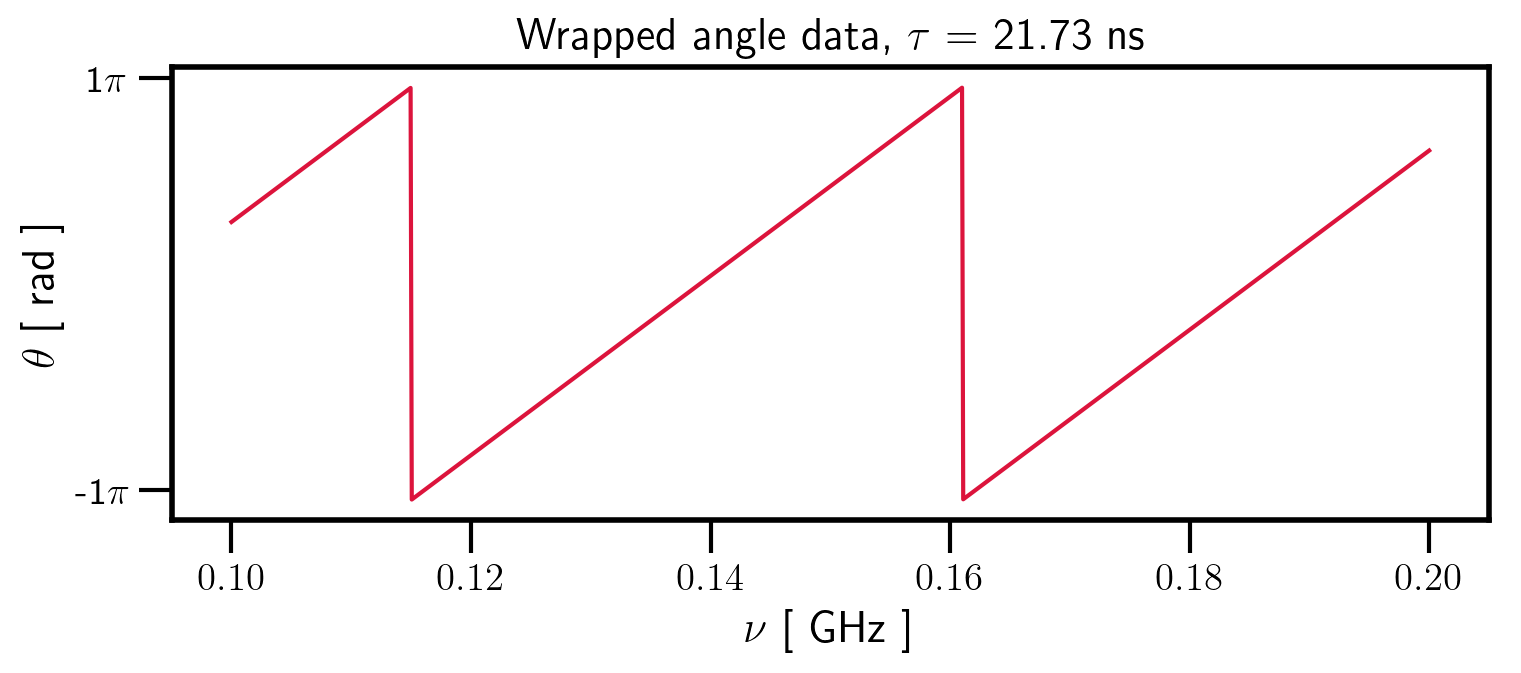

In [47]:
# plot a random tau 
fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)
tau_choice = np.random.choice(taus)

w_angles = np.angle(np.exp(2 * np.pi * 1j * (tau_choice * freqs)))

ax.plot(freqs, w_angles,
        color = 'crimson')

ymax = int(np.pi + np.pi * round(float(np.ceil(ax.get_ylim()[1]))/(np.pi)))
ymin = int(np.pi * round(float(np.floor(ax.get_ylim()[0]))/(np.pi)))
yticks = np.arange(ymin, ymax, np.pi)[::2]
ax.set_yticks(yticks)
ax.set_yticklabels([r"{}$\pi$".format(int(round(value / np.pi))) for value in ax.get_yticks()])
ax.set_ylabel(r'$\theta$ [ rad ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')
ax.set_title(r'Wrapped angle data, $\tau$ = {:2.2f} ns'.format(tau_choice))
plt.show()

In [48]:
random_slope = np.diff(np.unwrap(w_angles)) / (2 * np.pi) / np.diff(freqs)
print(r'Slope: {:2.2f} ns'.format(np.mean(random_slope)))

Slope: 21.73 ns


> Lets generate a set of unwrapped noise free angle data and save it together with the computed slope.

In [54]:
rand_wangle_data = np.empty((num_taus, len(freqs)))

for i in range(num_taus):
    rand_wangle_data[i] = np.angle(np.exp(2 * np.pi * 1j * (taus[i] * freqs)))

In [59]:
df = pd.DataFrame(rand_wangle_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,2.449294e-15,-0.061419,-0.122838,-0.184258,-0.245677,-0.307096,-0.368515,-0.429934,-0.491354,-0.552773,...,0.552773,0.491354,0.429934,0.368515,0.307096,0.245677,0.184258,0.122838,0.061419,4.898587e-15
1,1.256763e-02,-0.048839,-0.110246,-0.171653,-0.233060,-0.294467,-0.355874,-0.417281,-0.478688,-0.540095,...,0.577798,0.516391,0.454984,0.393577,0.332170,0.270763,0.209356,0.147949,0.086542,2.513525e-02
2,2.513525e-02,-0.036259,-0.097654,-0.159049,-0.220443,-0.281838,-0.343233,-0.404627,-0.466022,-0.527417,...,0.602822,0.541428,0.480033,0.418638,0.357244,0.295849,0.234454,0.173060,0.111665,5.027051e-02
3,3.770288e-02,-0.023679,-0.085062,-0.146444,-0.207827,-0.269209,-0.330591,-0.391974,-0.453356,-0.514738,...,0.627847,0.566465,0.505082,0.443700,0.382318,0.320935,0.259553,0.198170,0.136788,7.540576e-02
4,5.027051e-02,-0.011100,-0.072470,-0.133840,-0.195210,-0.256580,-0.317950,-0.379320,-0.440690,-0.502060,...,0.652872,0.591502,0.530132,0.468761,0.407391,0.346021,0.284651,0.223281,0.161911,1.005410e-01


> Each colum represents a frequency channel, each row a set of noise free angle data

In [60]:
get_slope = lambda x: np.mean((np.diff(np.unwrap(x))  / (2 * np.pi)) / np.diff(freqs))

df.insert(0, 'slope', [get_slope(angle_data) for angle_data in rand_wangle_data])

In [61]:
df.head()

,slope,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-100.000000,2.449294e-15,-0.061419,-0.122838,-0.184258,-0.245677,-0.307096,-0.368515,-0.429934,-0.491354,...,0.552773,0.491354,0.429934,0.368515,0.307096,0.245677,0.184258,0.122838,0.061419,4.898587e-15
1,-99.979998,1.256763e-02,-0.048839,-0.110246,-0.171653,-0.233060,-0.294467,-0.355874,-0.417281,-0.478688,...,0.577798,0.516391,0.454984,0.393577,0.332170,0.270763,0.209356,0.147949,0.086542,2.513525e-02
2,-99.959996,2.513525e-02,-0.036259,-0.097654,-0.159049,-0.220443,-0.281838,-0.343233,-0.404627,-0.466022,...,0.602822,0.541428,0.480033,0.418638,0.357244,0.295849,0.234454,0.173060,0.111665,5.027051e-02
3,-99.939994,3.770288e-02,-0.023679,-0.085062,-0.146444,-0.207827,-0.269209,-0.330591,-0.391974,-0.453356,...,0.627847,0.566465,0.505082,0.443700,0.382318,0.320935,0.259553,0.198170,0.136788,7.540576e-02
4,-99.919992,5.027051e-02,-0.011100,-0.072470,-0.133840,-0.195210,-0.256580,-0.317950,-0.379320,-0.440690,...,0.652872,0.591502,0.530132,0.468761,0.407391,0.346021,0.284651,0.223281,0.161911,1.005410e-01


In [62]:
df.to_csv('data/wu_perfect_lin_tau_0_phase_10000.csv', index = False)

> `wu_perfect_lin_tau_0_phase_10000.csv` is about 100 MB. 

> Lets open it in `wu_perfect_lin_tau_0_phase_NN_training.ipynb`